<a href="https://colab.research.google.com/github/Akhil099/cs666student/blob/main/Copy_of_CS666_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

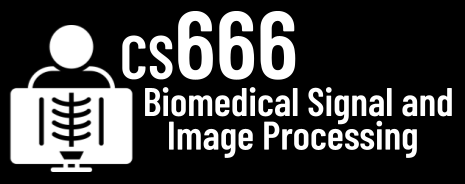
#Assignment 5

In [2]:
# NAME:B.Akhil

In [3]:
# In this assignment, we will visualize and explore a CT scan!

In [4]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
# we are using pydicom, so lets install it!
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.1 MB/s eta 0:00:00


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [6]:
# Use wget to download https://cs666.org/data/ct.zip!
# This is a CT scan of an arm in DICOM format.

In [7]:
# TODO: YOUR CODE
!wget "https://cs666.org/data/ct.zip"

--2024-04-16 02:47:57--  https://cs666.org/data/ct.zip
Resolving cs666.org (cs666.org)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to cs666.org (cs666.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5847706 (5.6M) [application/zip]
Saving to: ‘ct.zip’

ct.zip              100%[===================>]   5.58M  21.6MB/s    in 0.3s    

2024-04-16 02:47:58 (21.6 MB/s) - ‘ct.zip’ saved [5847706/5847706]



In [8]:
# Then use the following snippet to extract the data.

In [9]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [10]:
# 1) Let's explore the data using the Files panel on the left.
# TODO: How many slices are there?

In [11]:
# TODO: YOUR_ANSWER
#there are 220 slices in ct folder

In [12]:
# 2) Let's visualize the data with SliceDrop!
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [13]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

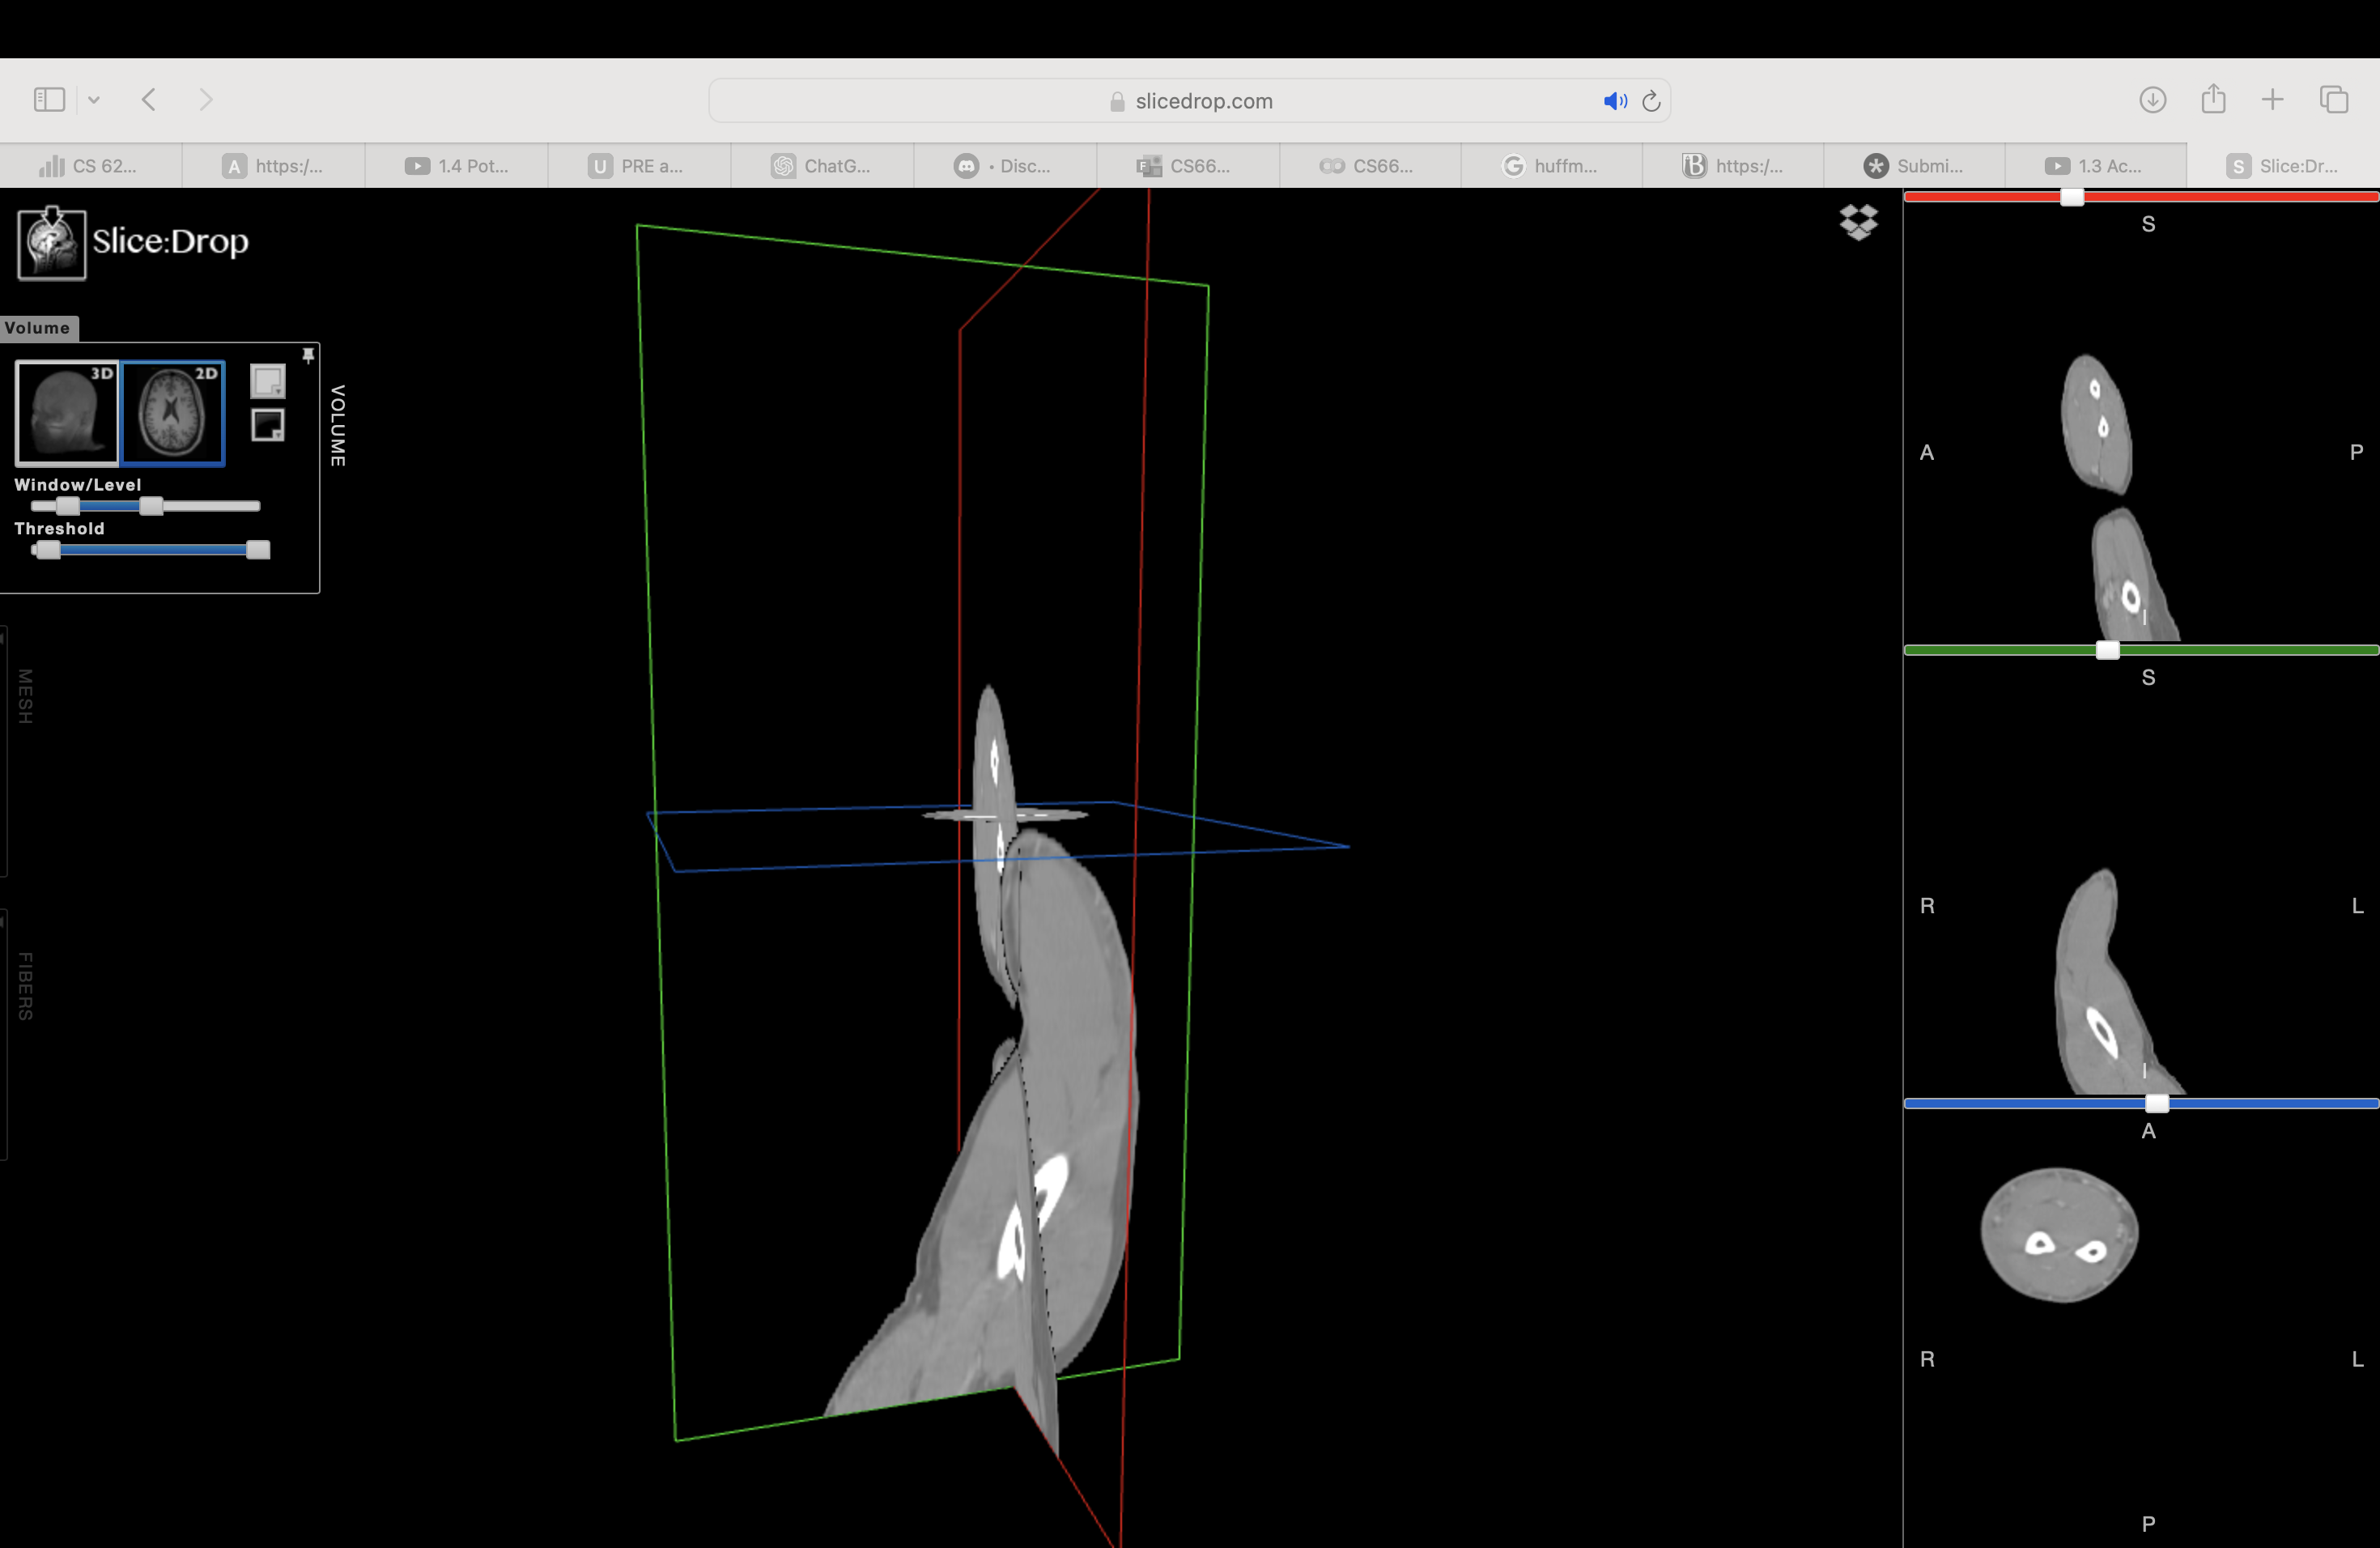

In [14]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [15]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click.

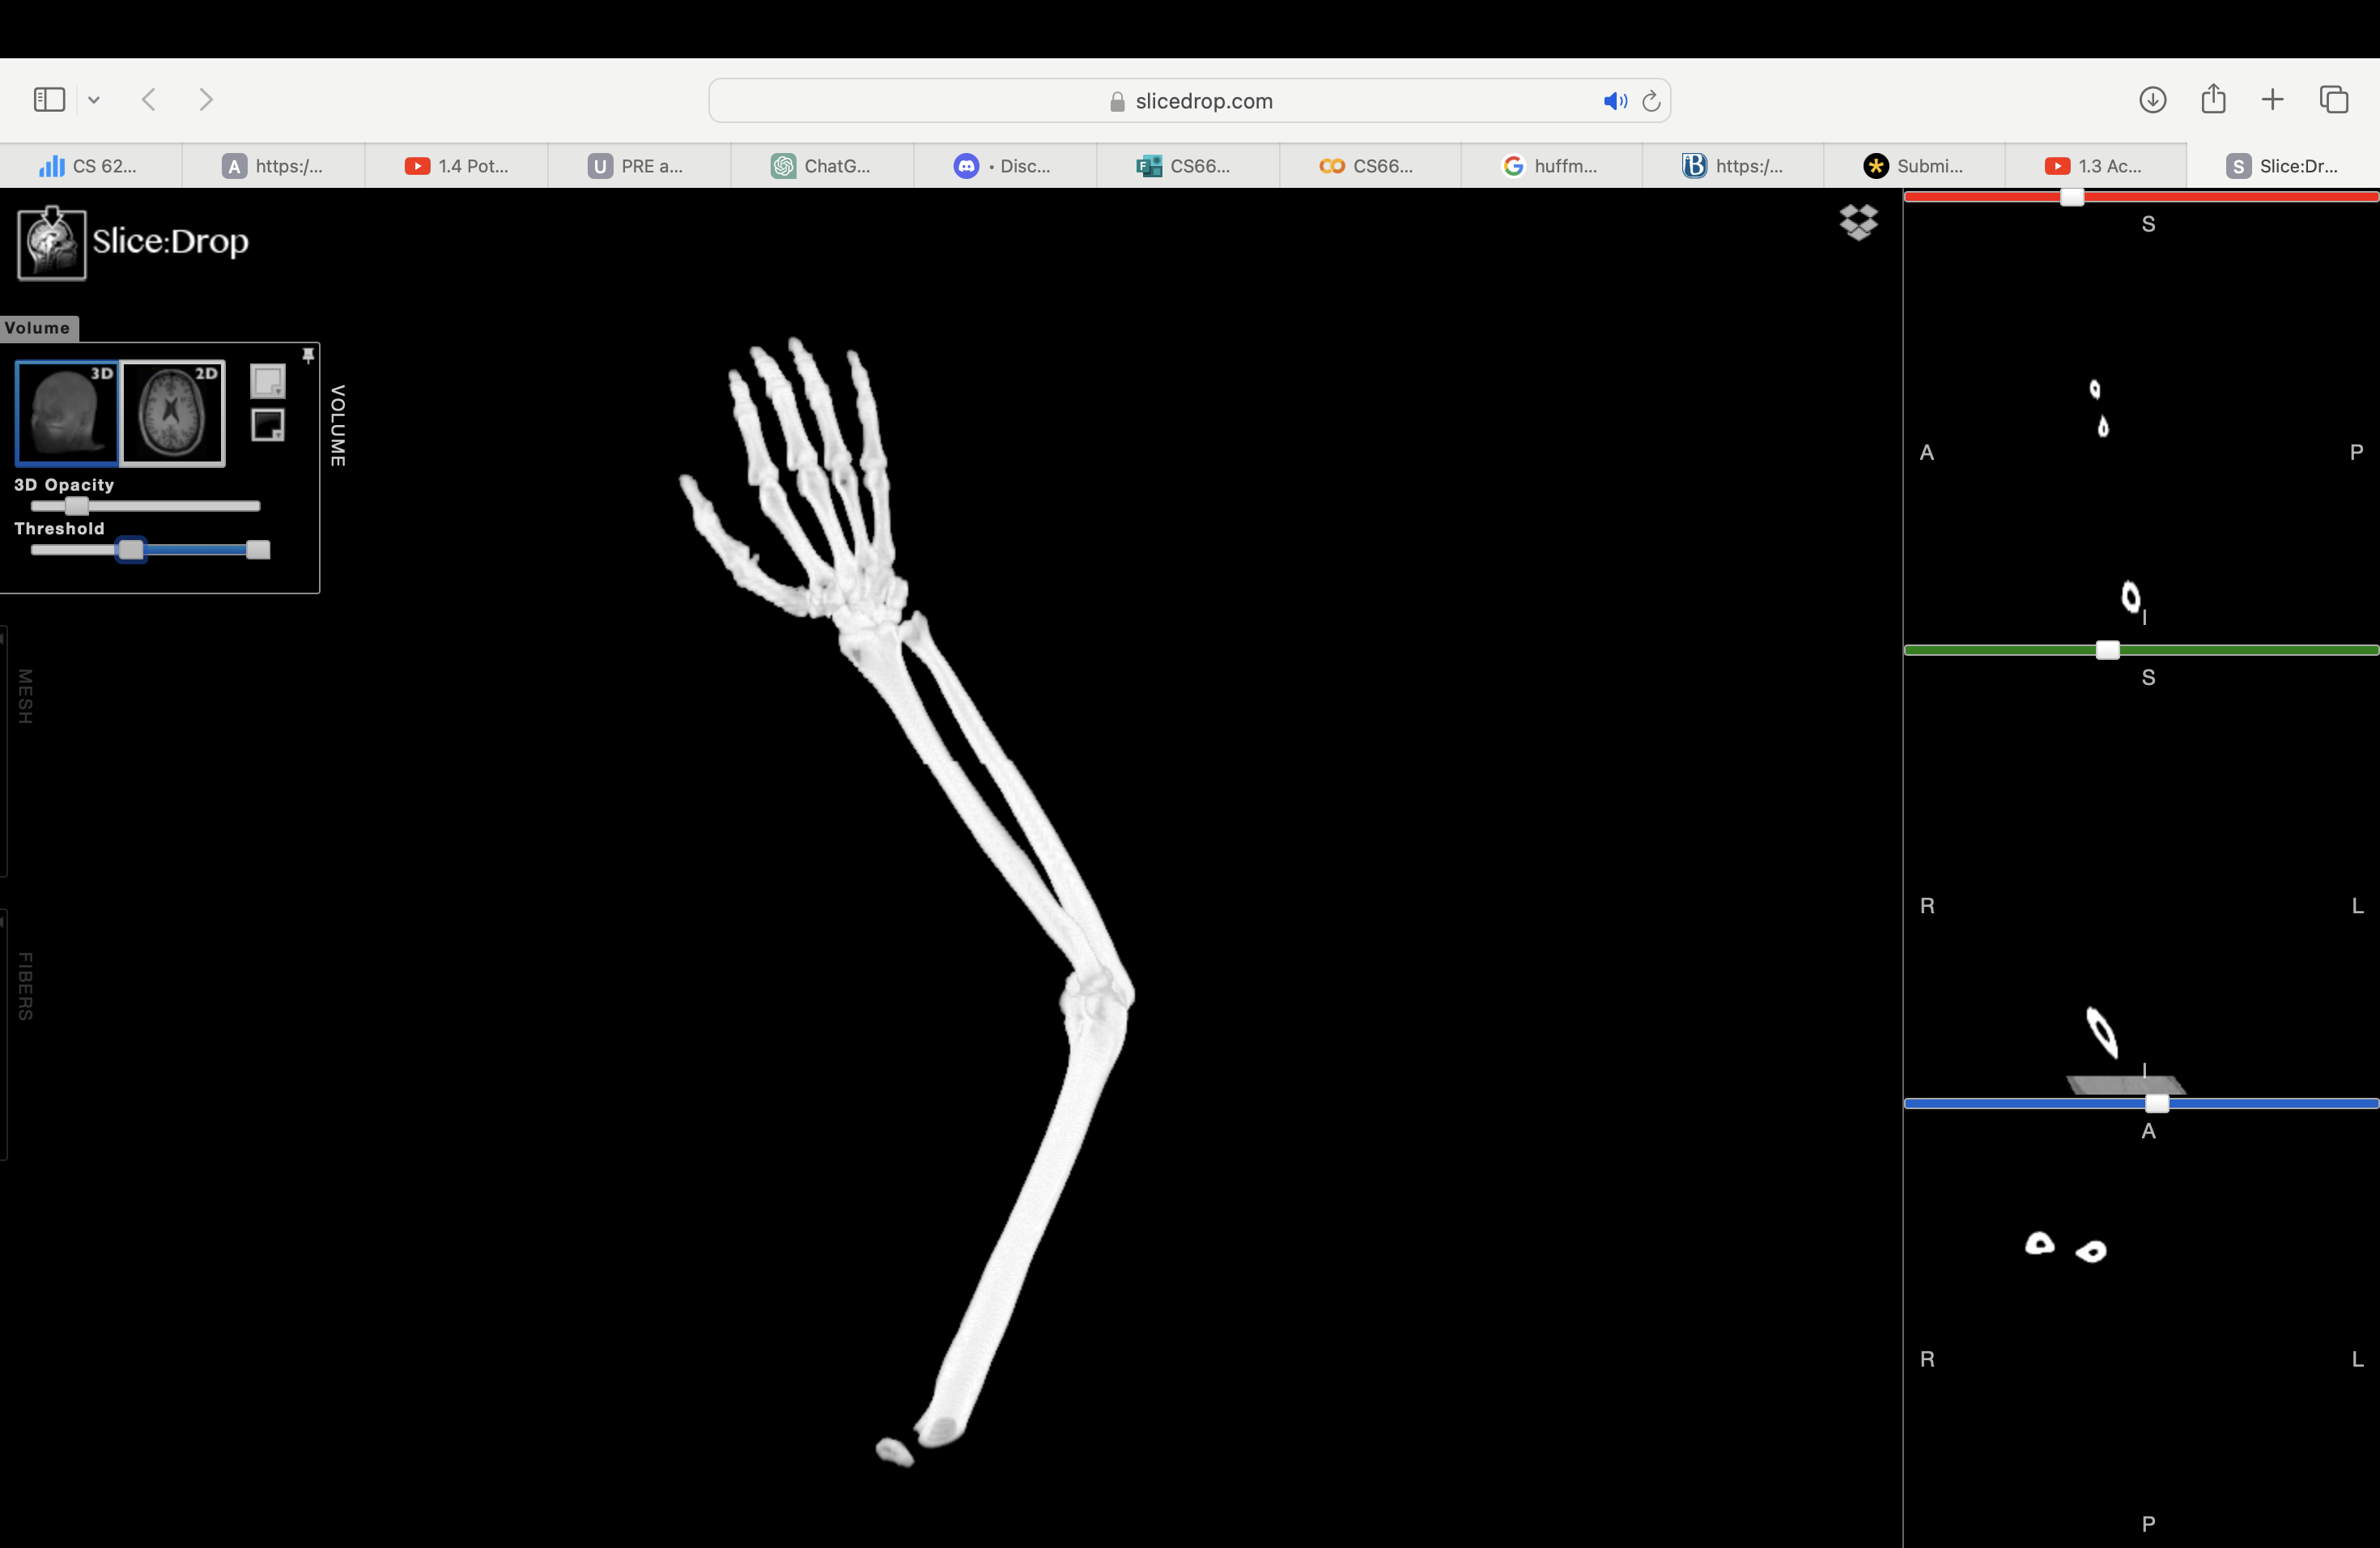

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [16]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [17]:
from pydicom import dcmread

In [18]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
import os
import numpy as np

dir_path = "./ct"
print(dir_path)

dicom_files= [f for f in os.listdir(dir_path) if f.endswith(".dcm")]
# print(dicom_files)
dicom_files.sort()

# print(dicom_files)

pixel_arrays = []
for filename in dicom_files:
  filepath = os.path.join(dir_path, filename)
  dcm = dcmread(filepath)
  # print(f"The center is : {dcm.WindowCenter} and width is : {dcm.WindowWidth}")
  pixel_arrays.append(dcm.pixel_array)


image_3d= np.stack(pixel_arrays, axis = 0)

print(f"3d image array shape : {image_3d.shape}")

./ct
3d image array shape : (220, 454, 512)


In [19]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

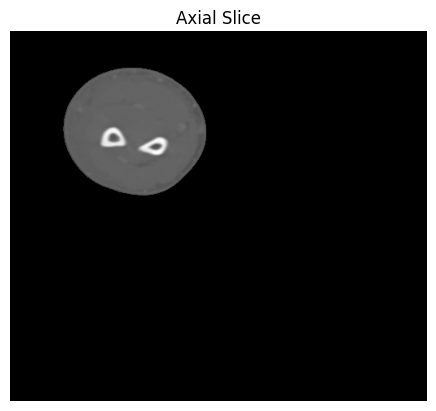

In [20]:
# TODO: YOUR CODE FOR AXIAL
import matplotlib.pyplot as plt
axial_slice_index = image_3d.shape[0] // 2


axial_slice = image_3d[axial_slice_index, :, :]

# fig, ax = plt.subplots(figsize=(15, 5))
plt.imshow(axial_slice, cmap ="gray")
plt.title("Axial Slice")
plt.axis('off')
plt.show()

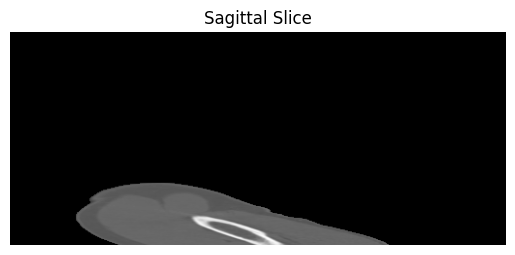

In [21]:
# TODO: YOUR CODE FOR SAGITTAL
import matplotlib.pyplot as plt
sagittal_slice_index = image_3d.shape[1] // 2

sagittal_slice = image_3d[:,sagittal_slice_index, :]

plt.imshow(sagittal_slice, cmap = "gray")
plt.title("Sagittal Slice")
plt.axis("off")
plt.show()

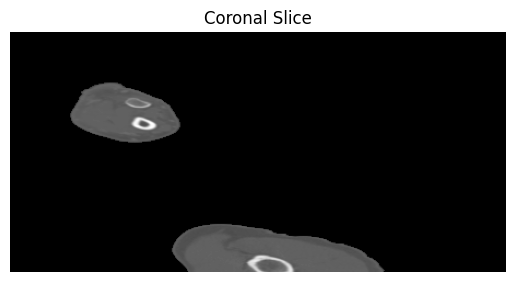

In [22]:
# TODO: YOUR CODE FOR CORONAL

import matplotlib.pyplot as plt
coronal_slice_index = image_3d.shape[2] // 2

coronal_slice = image_3d[:, :, coronal_slice_index]

plt.imshow(coronal_slice, cmap = "gray")
plt.title("Coronal Slice")
plt.axis("off")
plt.show()

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [23]:
# We will now enhance the visualization from above by performing
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [24]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

30
410
-1024.0
vmin: -175.0
vmax: 235.0

110
(454, 512)


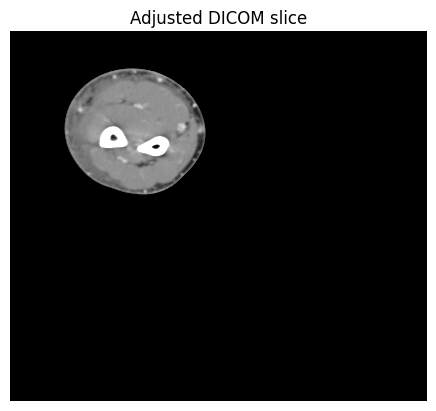

In [25]:
# TODO: YOUR CODE
import os
# for filename in dicom_files:
#   print(f"The center is : {dcm.WindowCenter} and width is : {dcm.WindowWidth}")

file_path = os.path.join(dir_path, dicom_files[4])

dcm = dcmread(file_path)
# print(dcm)

window_center = dcm[0x0028, 0x1050].value
window_width = dcm[0x0028, 0x1051].value

print(window_center)
print(window_width)

rescale_intercept = float(dcm.RescaleIntercept) if 'RescaleIntercept' in dcm else 0
rescale_slope = float(dcm.RescaleSlope) if 'RescaleSlope' in dcm else 0

print(rescale_intercept)
vmin = window_center - window_width /2 if window_center and window_width else None
print(f"vmin: {vmin}")
vmax = window_center + window_width /2 if window_center and window_width else None
print(f"vmax: {vmax}")

print()
hu_pixels = image_3d.astype(float) * rescale_slope + rescale_intercept

middle_slice = hu_pixels.shape[0] // 2
print(middle_slice)

print(hu_pixels[middle_slice].shape)

plt.imshow(hu_pixels[middle_slice], cmap = 'gray', vmin = vmin, vmax = vmax)
plt.title("Adjusted DICOM slice")
plt.axis("off")
plt.show()


In [26]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

30
410
-1024.0


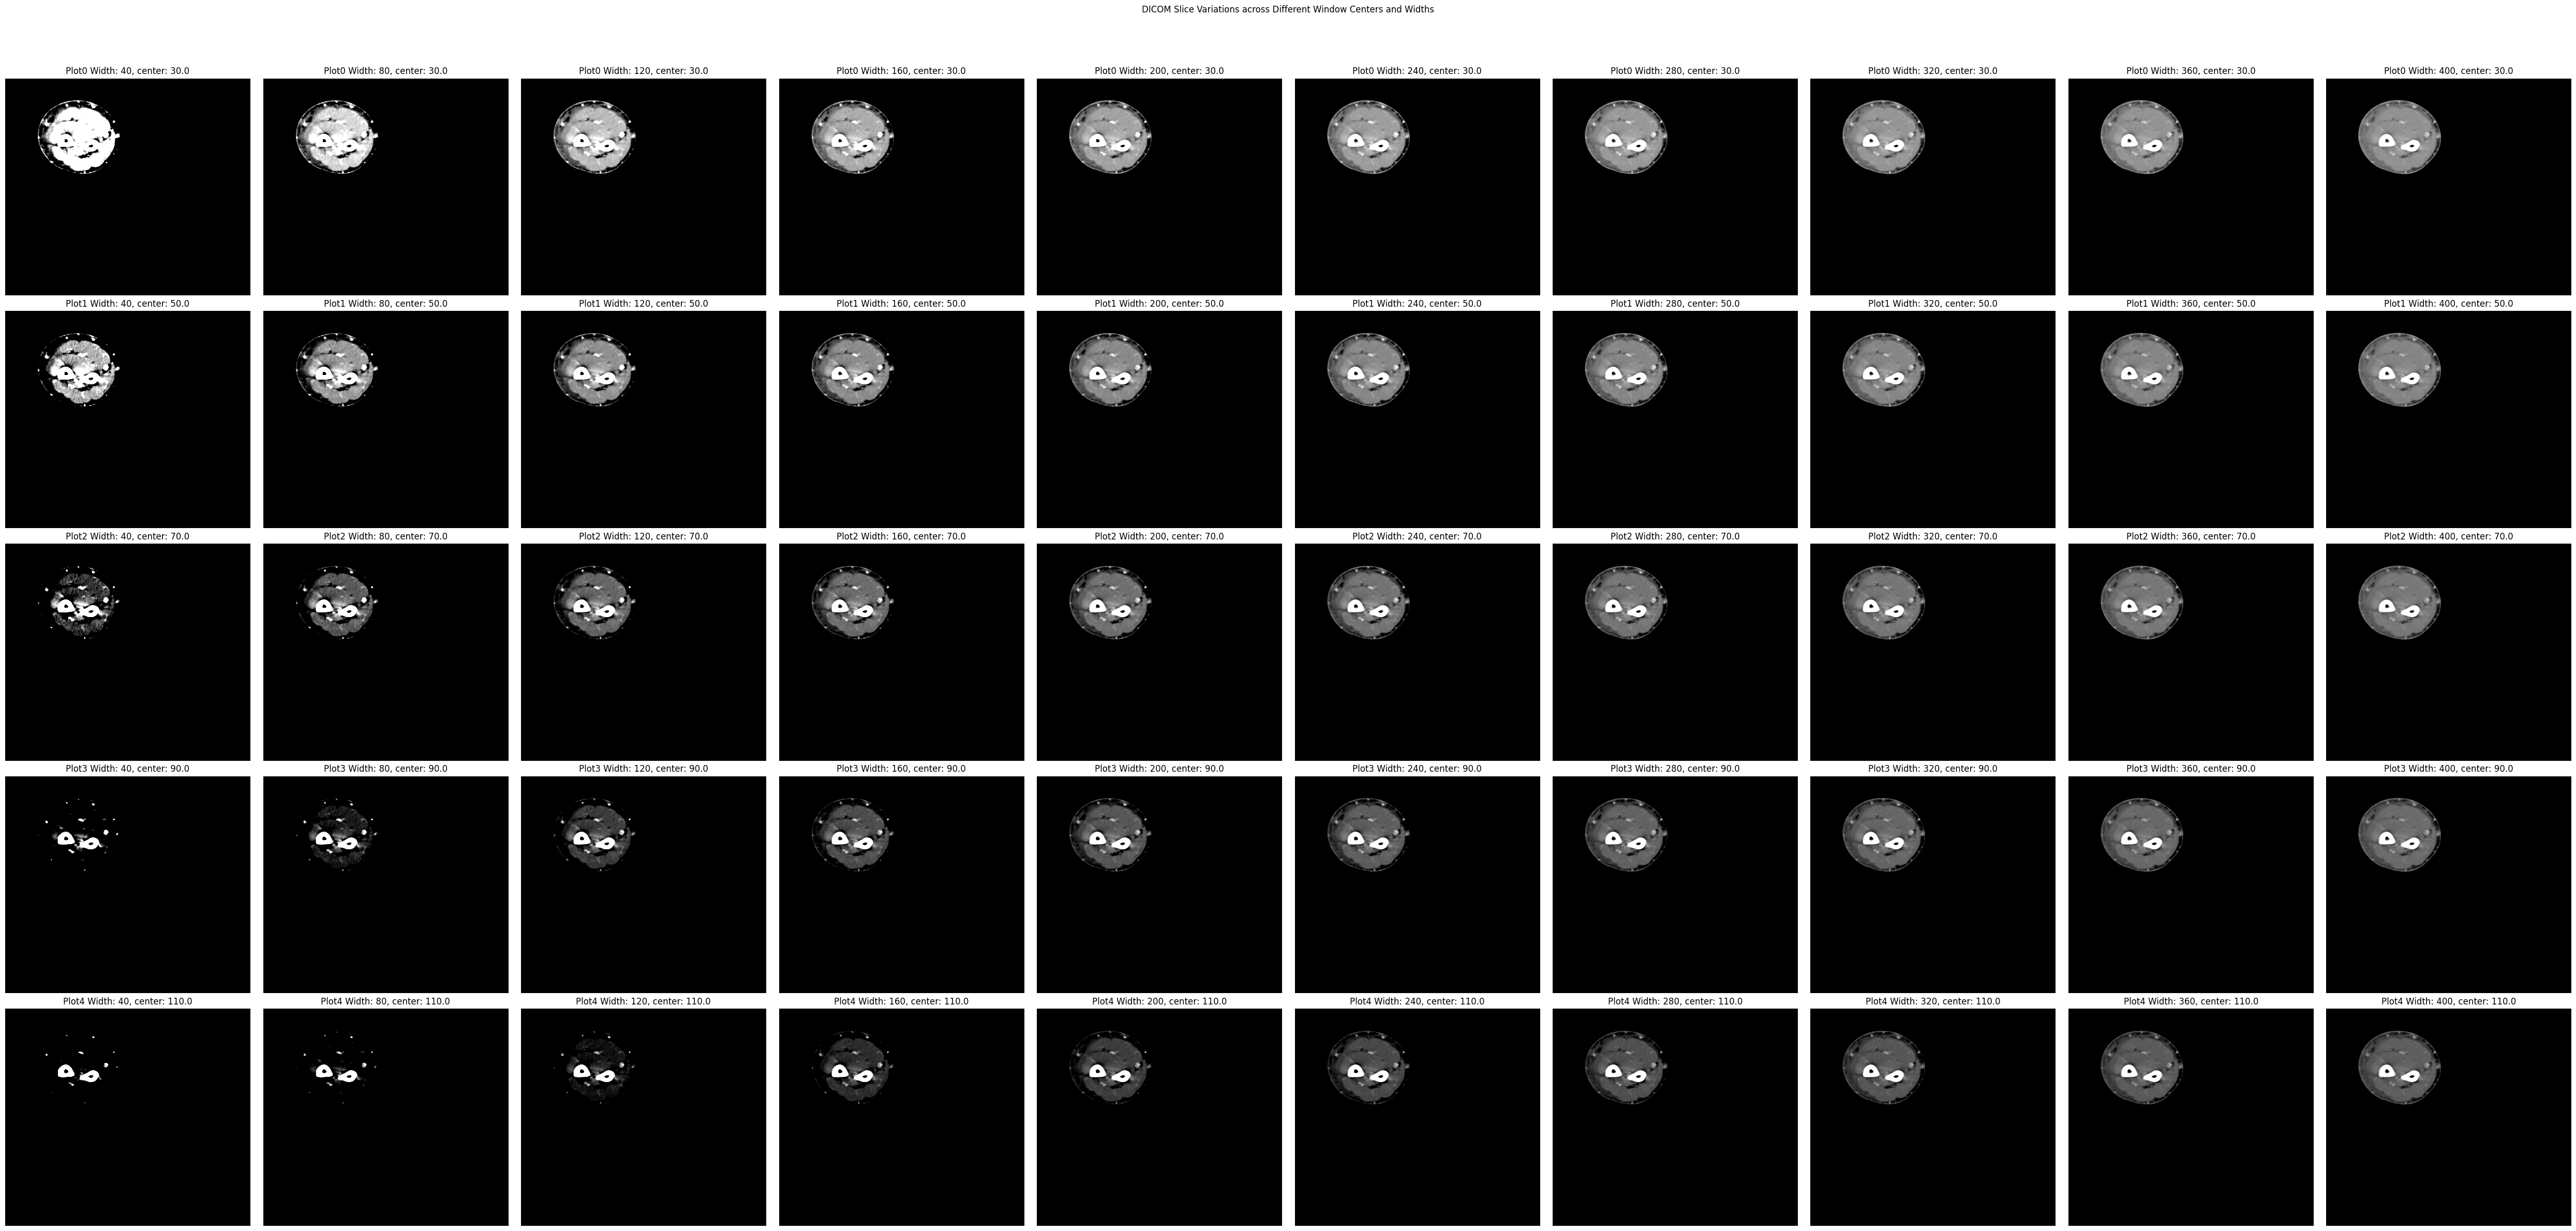

In [27]:
# TODO: YOUR CODE
file_path = os.path.join(dir_path, dicom_files[0])

dcm = dcmread(file_path)
# print(dcm)

window_center = dcm[0x0028, 0x1050].value
window_width1 = dcm[0x0028, 0x1051].value

print(window_center)
print(window_width)

rescale_intercept = float(dcm.RescaleIntercept) if 'RescaleIntercept' in dcm else 0
rescale_slope = float(dcm.RescaleSlope) if 'RescaleSlope' in dcm else 0

print(rescale_intercept)

# initial_center = float(dcm[0x0028, 0x1050].value)
center_increment = 20
num_center_steps = 5

initial_width = 40
increments = 40
num_steps = int((window_width1 - initial_width) // increments + 1)

if num_steps <= 0:
  num_steps = 1

fig, axes = plt.subplots(num_center_steps, num_steps, figsize=(num_steps * 5, num_center_steps * 5))
fig.suptitle('DICOM Slice Variations across Different Window Centers and Widths')
# Checking if there is only one plot and ensure 'axes' is iterable
if num_steps == 1 and num_center_steps == 1:
    axes = [[axes]]
elif num_center_steps == 1 or num_steps == 1:
    axes = axes.flatten()


for i in range(num_center_steps):
  for j in range(num_steps):
    current_center = window_center + center_increment * i
    current_width = initial_width + increments * j
    vmin = current_center - current_width /2 if window_center and window_width else None
    # print(f"vmin: {vmin}")
    vmax = current_center + current_width /2 if window_center and window_width else None
    # print(f"vmax: {vmax}")

    hu_pixels = image_3d.astype(float) * rescale_slope + rescale_intercept

    middle_slice = hu_pixels.shape[0] // 2
    # print(middle_slice)

    ax = axes[i][j]  if num_center_steps > 1 else axes[j]
    ax.imshow(hu_pixels[middle_slice], cmap = 'gray', vmin = vmin, vmax = vmax)
    ax.set_title(f"Plot{i} Width: {current_width}, center: {current_center}")
    ax.axis("off")

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [28]:
# Which values make sense and why?

In [29]:
# TODO: YOUR ANSWER

In [30]:
#Our goal is to find the optimal values which makes the visualization look much better for CT scans. The code above plots different slices for varioius values of
#window_width and window_center. The optimal values depend on the specific CT scan and the structures of interest

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [31]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

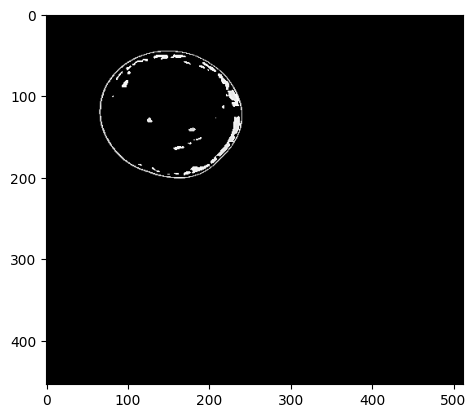

In [32]:
# TODO: YOUR CODE TO SEGMENT FAT
fat_segement_range = (80, 1000)

fat_mask = image_3d.copy()
fat_mask = fat_mask.astype(np.int16)
fat_mask[np.logical_or(fat_mask < fat_segement_range[0], fat_mask > fat_segement_range[1])] = 0

plt.imshow(fat_mask[110, :, :], cmap='gray')
plt.show()


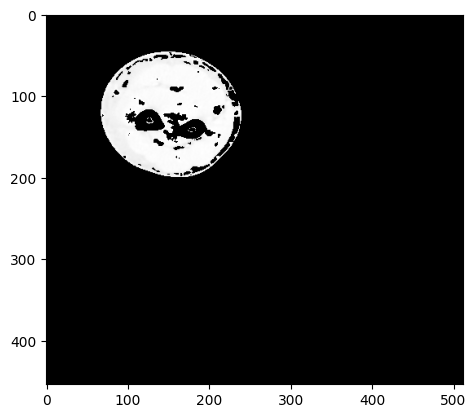

In [33]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE\
soft_tissue_segement_range = (1000, 1100)

fat_mask = image_3d.copy()
fat_mask = fat_mask.astype(np.int16)
fat_mask[np.logical_or(fat_mask < soft_tissue_segement_range[0], fat_mask > soft_tissue_segement_range[1])] = 0

plt.imshow(fat_mask[110, :, :], cmap='gray')
plt.show()

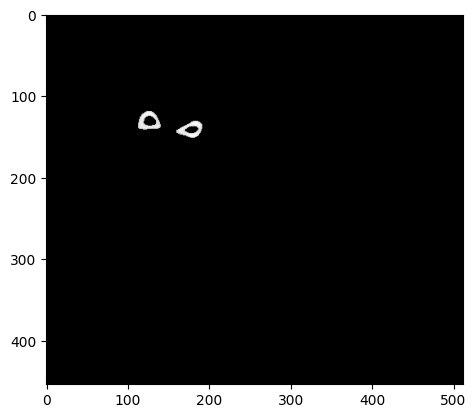

In [34]:
# TODO: YOUR CODE TO SEGMENT BONES
bone_segement_range = (2000, 2900)

fat_mask = image_3d.copy()
fat_mask = fat_mask.astype(np.int16)
fat_mask[np.logical_or(fat_mask < bone_segement_range[0], fat_mask > bone_segement_range[1])] = 0

plt.imshow(fat_mask[110, :, :], cmap='gray')
plt.show()

In [35]:
# Are the segmentations good?

In [36]:
# TODO: YOUR ANSWER
#yes the segmentations for good and are well defined

In [37]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""